In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_df = pd.read_excel('Pokemon_train.csv.xlsx',  sheet_name=0)
test_df = pd.read_excel('Pokemon_test.csv.xlsx',  sheet_name=0)

In [3]:
train_df.head()

,Id,Pokemon_Name,Type1,Type2,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Height_M,Weight_KG,Legendary
0,791,Solgaleo,Psychic,Steel,137,137,107,113,89,97,3.4,230.0,1
1,638,Cobalion,Steel,Fighting,91,90,129,90,72,108,2.1,250.0,1
2,445,Garchomp,Dragon,Ground,108,130,95,80,85,102,1.9,95.0,0
3,333,Swablu,Normal,Flying,45,40,60,40,75,50,0.4,1.2,0
4,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,0.8,1.2,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               647 non-null    int64  
 1   Pokemon_Name     647 non-null    object 
 2   Type1            647 non-null    object 
 3   Type2            328 non-null    object 
 4   HP               647 non-null    int64  
 5   Attack           647 non-null    int64  
 6   Defense          647 non-null    int64  
 7   Special_Attack   647 non-null    int64  
 8   Special_Defense  647 non-null    int64  
 9   Speed            647 non-null    int64  
 10  Height_M         647 non-null    float64
 11  Weight_KG        647 non-null    float64
 12  Legendary        647 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 65.8+ KB


In [5]:
train_df.describe()

,Id,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Height_M,Weight_KG,Legendary
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,407.173107,67.996909,75.574961,70.953632,69.326121,69.482226,66.058733,1.145904,58.870634,0.100464
std,234.167819,25.975935,29.656133,29.082636,29.322964,27.069214,27.886928,1.099075,101.888713,0.300850
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.100000,0.100000,0.000000
25%,197.500000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,0.500000,8.500000,0.000000
50%,412.000000,65.000000,73.000000,65.000000,65.000000,65.000000,65.000000,1.000000,26.600000,0.000000
75%,611.500000,80.000000,95.000000,89.000000,90.000000,85.000000,85.000000,1.400000,60.500000,0.000000
max,809.000000,255.000000,181.000000,200.000000,154.000000,200.000000,160.000000,14.500000,999.900000,1.000000


In [6]:
train_df['Type1'].unique()

array(['Psychic', 'Steel', 'Dragon', 'Normal', 'Bug', 'Rock', 'Water',
       'Fire', 'Fighting', 'Ghost', 'Grass', 'Dark', 'Ice', 'Ground',
       'Poison', 'Electric', 'Fairy', 'Flying'], dtype=object)

In [7]:
train_df['Type2'].unique()

array(['Steel', 'Fighting', 'Ground', 'Flying', 'Ghost', nan, 'Psychic',
       'Fire', 'Rock', 'Grass', 'Ice', 'Poison', 'Dragon', 'Fairy',
       'Water', 'Electric', 'Dark', 'Bug', 'Normal'], dtype=object)

In [8]:
train_df['Type1'].value_counts()

Water       93
Normal      84
Grass       63
Bug         60
Fire        45
Psychic     43
Rock        37
Electric    32
Dark        25
Dragon      24
Poison      24
Steel       23
Ground      22
Ghost       19
Ice         19
Fighting    19
Fairy       13
Flying       2
Name: Type1, dtype: int64

In [9]:
train_df['Type2'].value_counts()

Flying      79
Ground      29
Poison      27
Fairy       26
Fighting    21
Psychic     20
Dark        16
Grass       15
Steel       14
Water       14
Ghost       14
Rock        11
Dragon      10
Ice          9
Fire         8
Electric     7
Bug          5
Normal       3
Name: Type2, dtype: int64

In [10]:
print('Min hp :', train_df['HP'].min())
print('Max hp :', train_df['HP'].max())

Min hp : 1
Max hp : 255


In [11]:
print('Min Attack :', train_df['Attack'].min())
print('Max Attack :', train_df['Attack'].max())

Min Attack : 5
Max Attack : 181


In [12]:
print('Min Defense :', train_df['Defense'].min())
print('Max Defense :', train_df['Defense'].max())

Min Defense : 5
Max Defense : 200


In [13]:
print('Min Special_Attack :', train_df['Special_Attack'].min())
print('Max Special_Attack :', train_df['Special_Attack'].max())

Min Special_Attack : 10
Max Special_Attack : 154


In [14]:
print('Min Special_Defense :', train_df['Special_Defense'].min())
print('Max Special_Defense :', train_df['Special_Defense'].max())

Min Special_Defense : 20
Max Special_Defense : 200


In [15]:
print('Min Speed :', train_df['Speed'].min())
print('Max Speed :', train_df['Speed'].max())

Min Speed : 5
Max Speed : 160


In [16]:
print('Min Height_M :', train_df['Height_M'].min())
print('Max Height_M :', train_df['Height_M'].max())

Min Height_M : 0.1
Max Height_M : 14.5


In [17]:
print('Min Weight_KG :', train_df['Weight_KG'].min())
print('Max Weight_KG :', train_df['Weight_KG'].max())

Min Weight_KG : 0.1
Max Weight_KG : 999.9


In [18]:
train_df['Legendary'].value_counts()

0    582
1     65
Name: Legendary, dtype: int64

In [19]:
#checking the count of missing values 
train_df.isna().sum()

Id                   0
Pokemon_Name         0
Type1                0
Type2              319
HP                   0
Attack               0
Defense              0
Special_Attack       0
Special_Defense      0
Speed                0
Height_M             0
Weight_KG            0
Legendary            0
dtype: int64

In [20]:
#Filling the mising values of categorical variable
train_df['Type2'] = train_df['Type2'].fillna(train_df['Type2'].mode()[0])

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               647 non-null    int64  
 1   Pokemon_Name     647 non-null    object 
 2   Type1            647 non-null    object 
 3   Type2            647 non-null    object 
 4   HP               647 non-null    int64  
 5   Attack           647 non-null    int64  
 6   Defense          647 non-null    int64  
 7   Special_Attack   647 non-null    int64  
 8   Special_Defense  647 non-null    int64  
 9   Speed            647 non-null    int64  
 10  Height_M         647 non-null    float64
 11  Weight_KG        647 non-null    float64
 12  Legendary        647 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 65.8+ KB


# EDA :

<AxesSubplot:xlabel='Height_M', ylabel='Type1'>

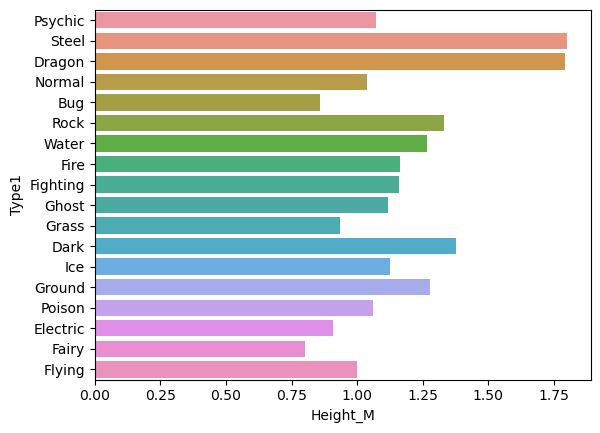

In [22]:
sns.barplot(data = train_df, x = 'Height_M', y = 'Type1', ci = None)

<AxesSubplot:xlabel='Height_M', ylabel='Type2'>

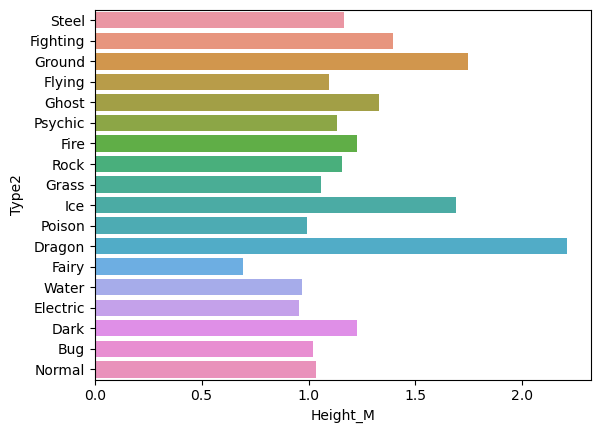

In [23]:
sns.barplot(data = train_df, x = 'Height_M', y = 'Type2', ci = None)

<AxesSubplot:xlabel='Height_M', ylabel='Density'>

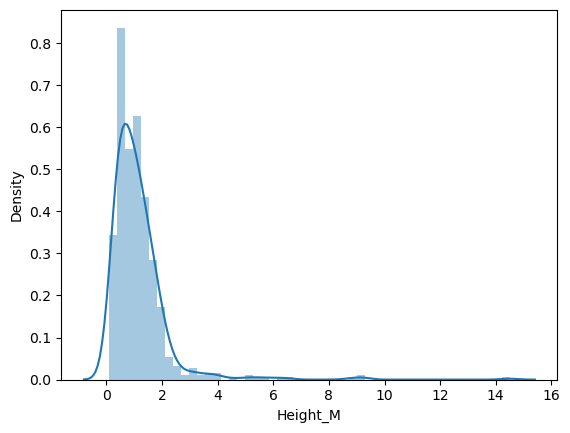

In [24]:
sns.distplot(train_df['Height_M'])

<AxesSubplot:xlabel='Weight_KG', ylabel='Density'>

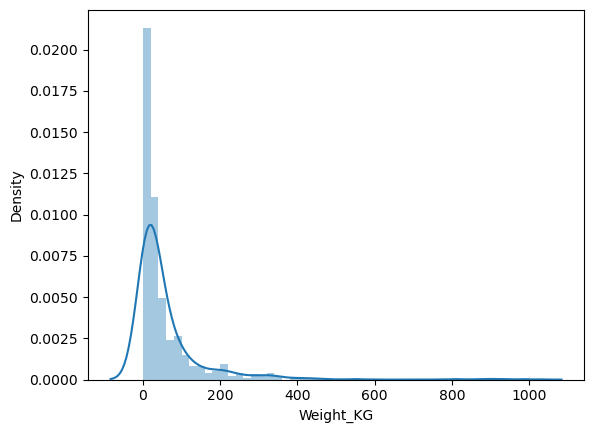

In [25]:
sns.distplot(train_df['Weight_KG'])

<AxesSubplot:xlabel='HP', ylabel='Defense'>

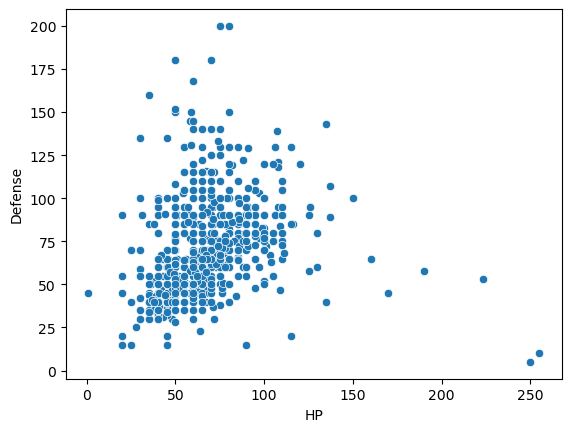

In [26]:
sns.scatterplot(data = train_df, x = 'HP', y = 'Defense')

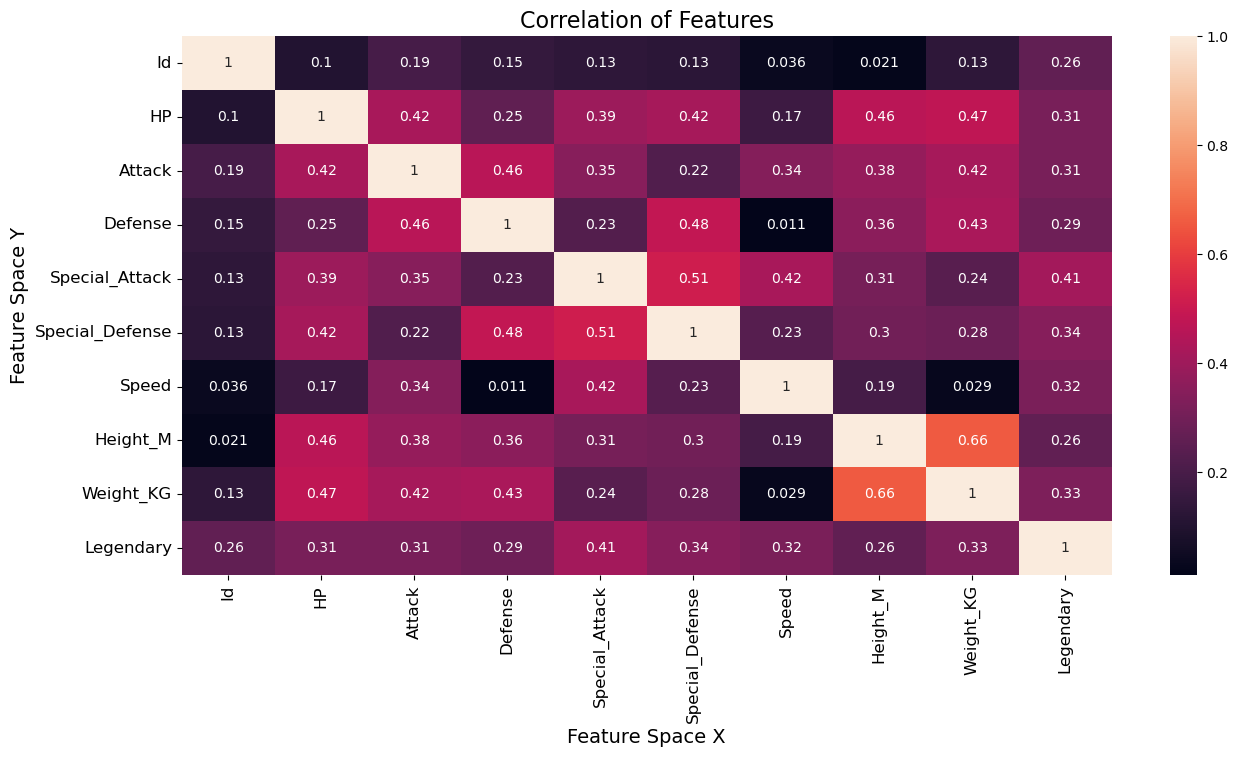

In [27]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

<AxesSubplot:xlabel='Attack', ylabel='Speed'>

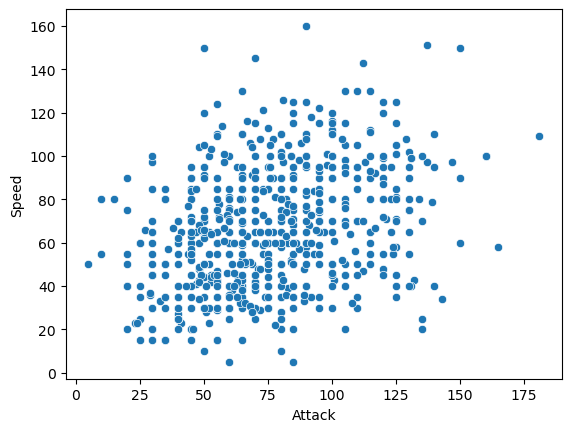

In [28]:
sns.scatterplot(data = train_df, x = 'Attack', y = 'Speed')

<AxesSubplot:xlabel='Weight_KG', ylabel='Height_M'>

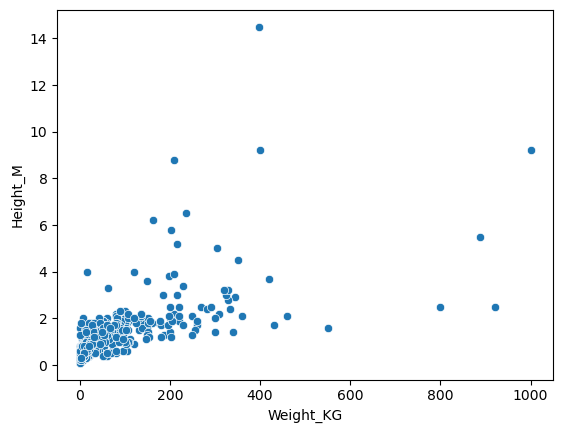

In [29]:
sns.scatterplot(data = train_df, x = 'Weight_KG', y = 'Height_M')

<AxesSubplot:xlabel='Legendary', ylabel='Special_Attack'>

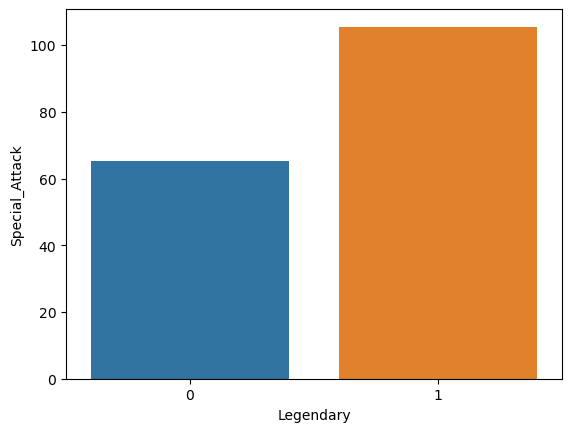

In [30]:
sns.barplot(data = train_df, x = 'Legendary', y = 'Special_Attack', ci = None)

<AxesSubplot:xlabel='Legendary', ylabel='HP'>

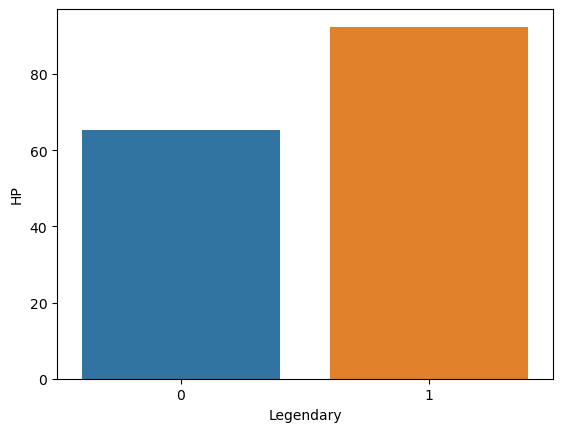

In [31]:
sns.barplot(data = train_df, x = 'Legendary', y = 'HP', ci = None)

<AxesSubplot:xlabel='Legendary', ylabel='Weight_KG'>

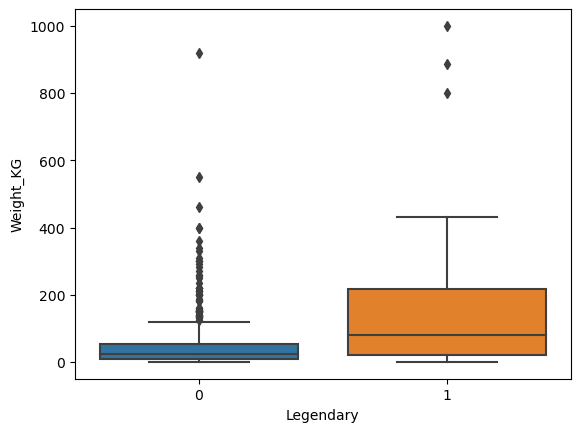

In [32]:
sns.boxplot(data = train_df, x = 'Legendary', y = 'Weight_KG')

<AxesSubplot:xlabel='Legendary', ylabel='Height_M'>

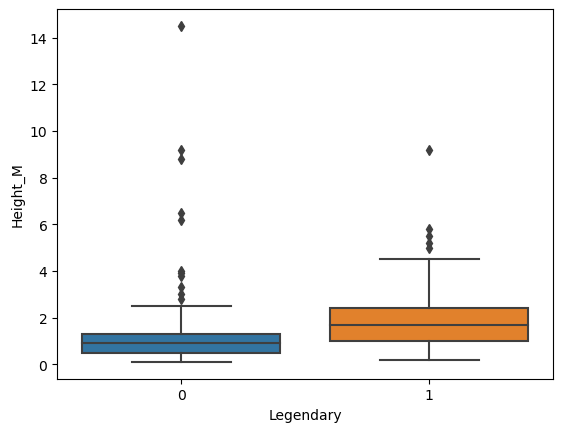

In [33]:
sns.boxplot(data = train_df, x = 'Legendary', y = 'Height_M')

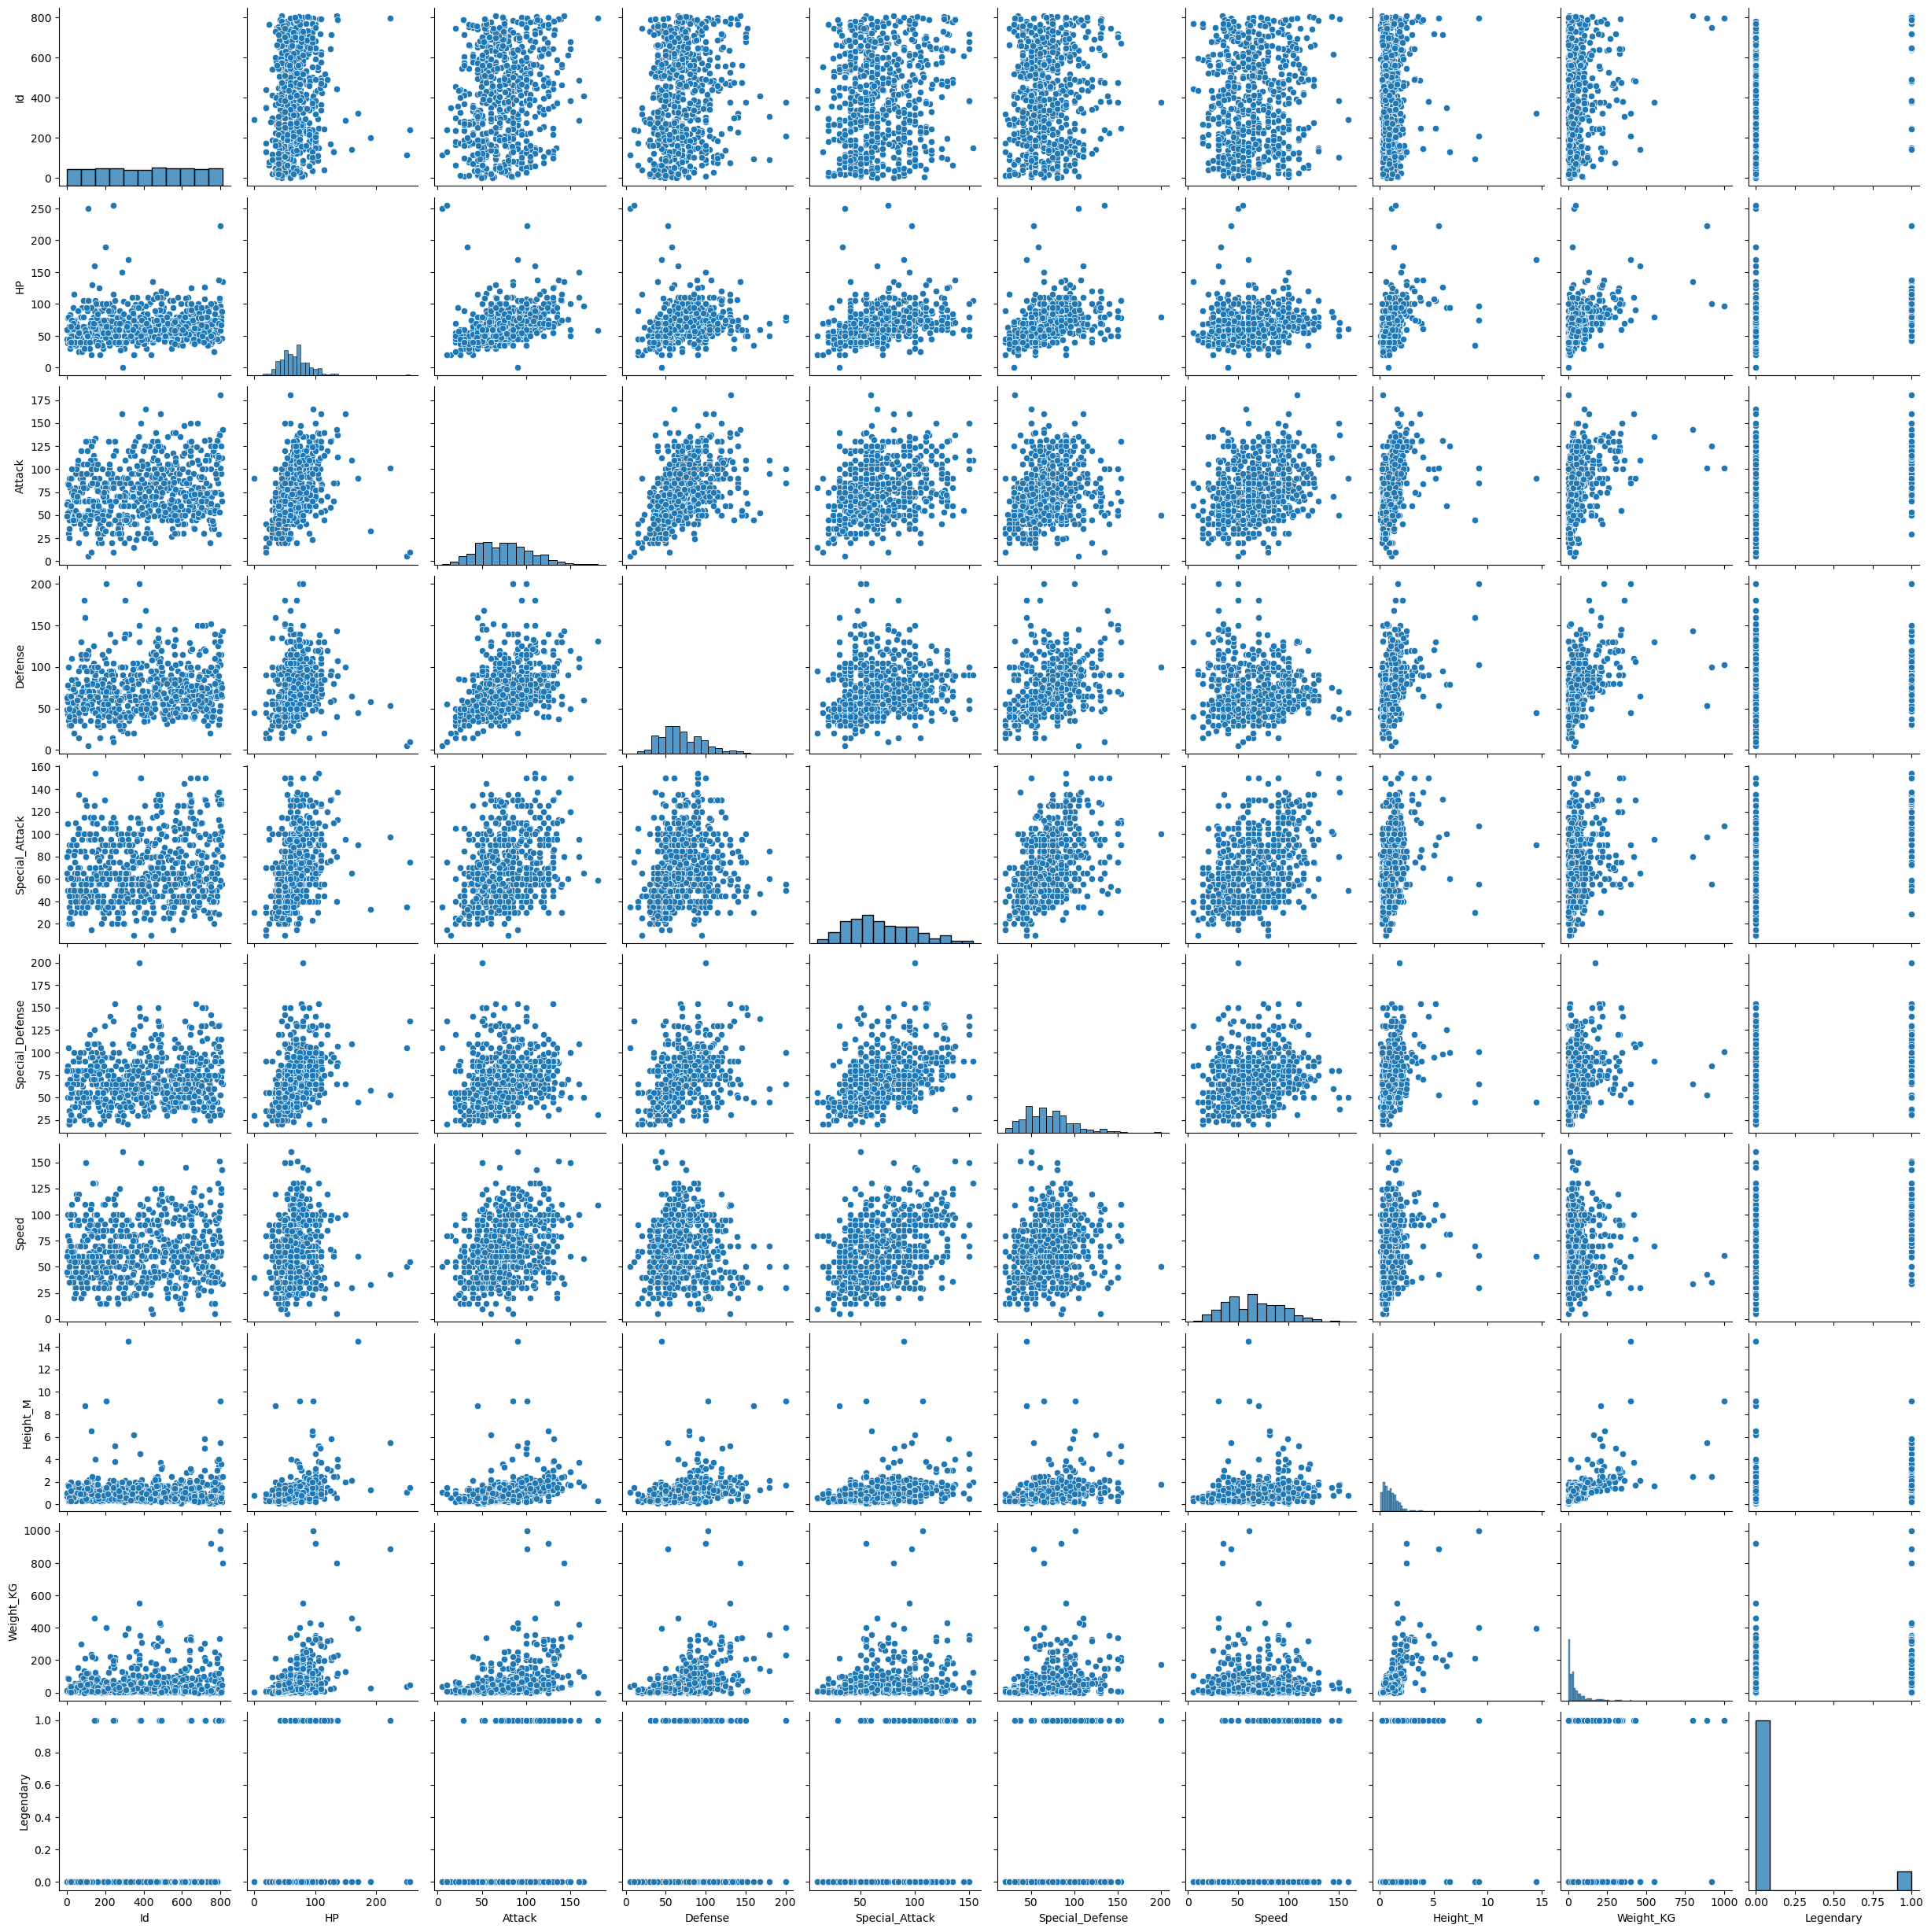

In [34]:
sns.pairplot(train_df)

In [35]:
#Dropping the unnecessary columns
train_df.drop(['Id', 'Pokemon_Name', 'Type1', 'Type2'], axis = 1, inplace = True)

HP


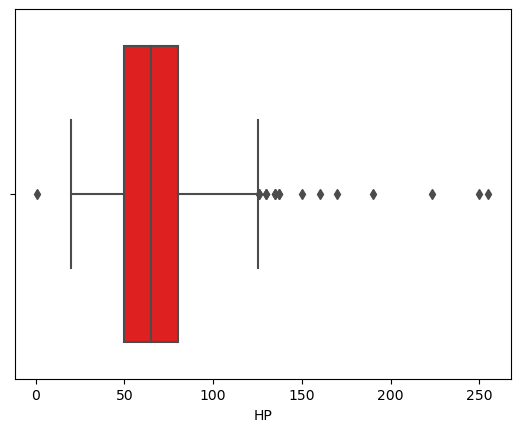

Attack


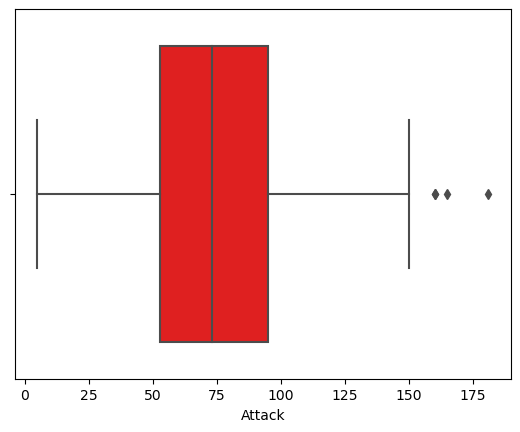

Defense


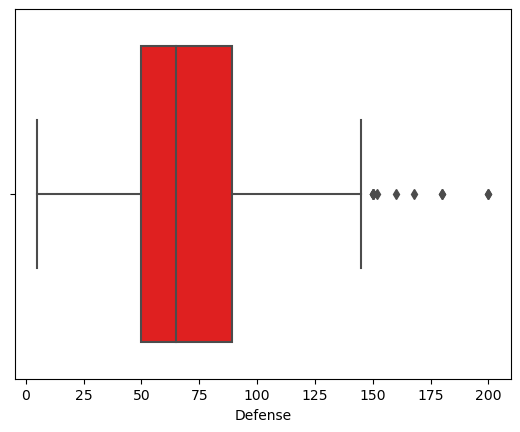

Special_Attack


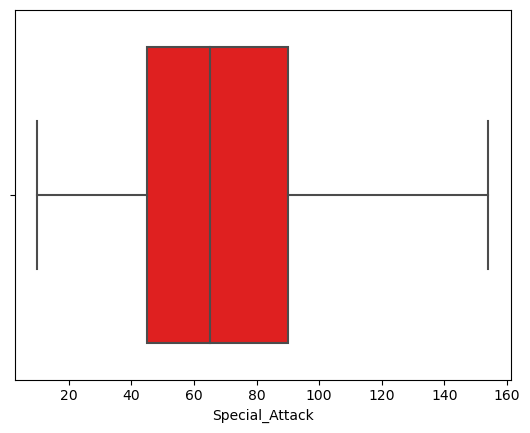

Special_Defense


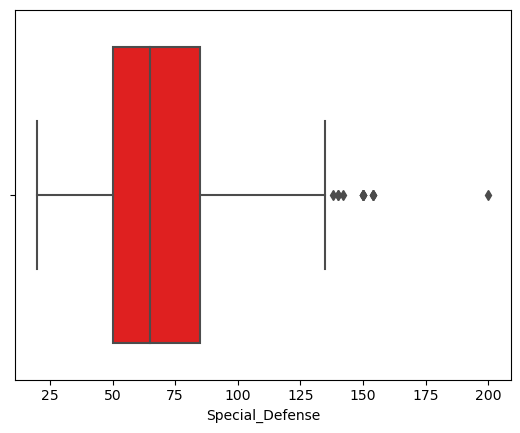

Speed


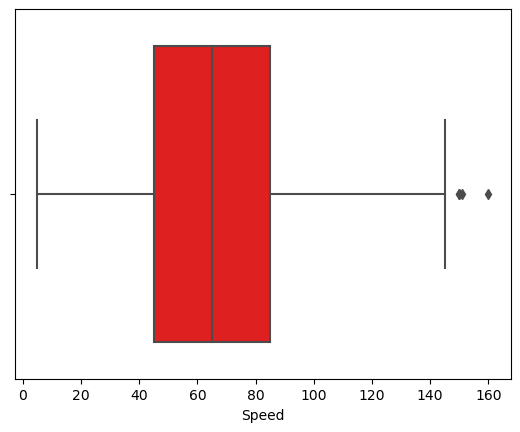

Height_M


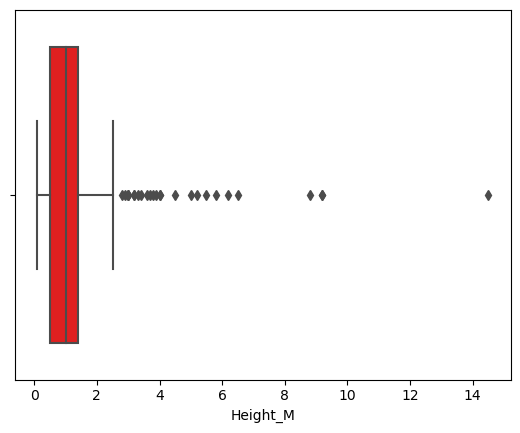

Weight_KG


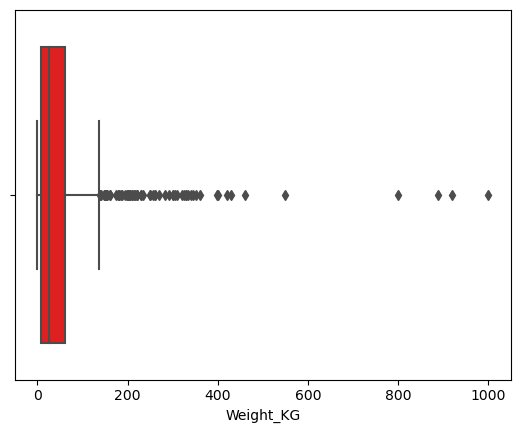

Legendary


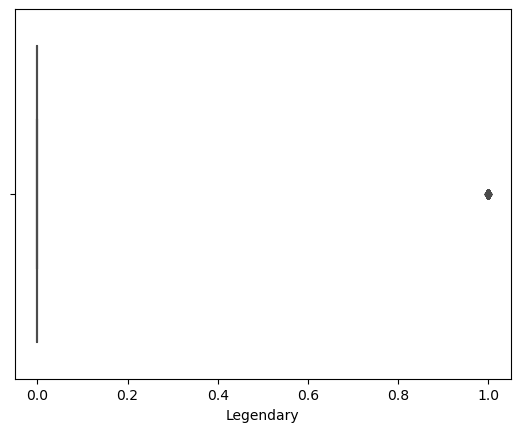

In [36]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [37]:
train_df['L_Hp'] = np.log(train_df['HP'])
train_df['L_Attack'] = np.log(train_df['Attack'])
train_df['L_Defense'] = np.log(train_df['Defense'])
train_df['L_Special_Defense'] = np.log(train_df['Special_Defense'])
train_df['L_Speed'] = np.log(train_df['Speed'])
train_df['L_Height'] = np.log(train_df['Height_M'])
train_df['L_Weightkg'] = np.log(train_df['Weight_KG'])

In [38]:
train_df['L_Legendary'] = train_df['Legendary'].map(lambda x: np.log(x) if x > 0 else 0 )

In [39]:
train_df.drop(['HP', 'Attack', 'Defense', 'Special_Defense', 'Speed', 'Height_M', 'Weight_KG', 'Legendary'], axis = 1, inplace = True)

In [40]:
train_df.head()

,Special_Attack,L_Hp,L_Attack,L_Defense,L_Special_Defense,L_Speed,L_Height,L_Weightkg,L_Legendary
0,113,4.919981,4.919981,4.672829,4.488636,4.574711,1.223775,5.438079,0.0
1,90,4.510860,4.499810,4.859812,4.276666,4.682131,0.741937,5.521461,0.0
2,80,4.682131,4.867534,4.553877,4.442651,4.624973,0.641854,4.553877,0.0
3,40,3.806662,3.688879,4.094345,4.317488,3.912023,-0.916291,0.182322,0.0
4,30,0.000000,4.499810,3.806662,3.401197,3.688879,-0.223144,0.182322,0.0


In [41]:
train_df['L_Legendary'] = train_df['L_Legendary'].astype('int')

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Special_Attack     647 non-null    int64  
 1   L_Hp               647 non-null    float64
 2   L_Attack           647 non-null    float64
 3   L_Defense          647 non-null    float64
 4   L_Special_Defense  647 non-null    float64
 5   L_Speed            647 non-null    float64
 6   L_Height           647 non-null    float64
 7   L_Weightkg         647 non-null    float64
 8   L_Legendary        647 non-null    int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 43.1 KB


# Train-Test Split:

In [43]:
x = train_df.drop('L_Legendary', axis = 1)
y = train_df['L_Legendary']

In [44]:
x

,Special_Attack,L_Hp,L_Attack,L_Defense,L_Special_Defense,L_Speed,L_Height,L_Weightkg
0,113,4.919981,4.919981,4.672829,4.488636,4.574711,1.223775,5.438079
1,90,4.510860,4.499810,4.859812,4.276666,4.682131,0.741937,5.521461
2,80,4.682131,4.867534,4.553877,4.442651,4.624973,0.641854,4.553877
3,40,3.806662,3.688879,4.094345,4.317488,3.912023,-0.916291,0.182322
4,30,0.000000,4.499810,3.806662,3.401197,3.688879,-0.223144,0.182322
...,...,...,...,...,...,...,...,...
642,50,3.688879,3.688879,3.555348,4.605170,4.248495,-0.105361,3.817712
643,35,3.912023,4.653960,4.369448,4.700480,4.330733,0.336472,3.916015
644,60,4.094345,3.912023,3.912023,4.248495,3.912023,0.182322,3.481240
645,24,4.043051,3.178054,4.454347,4.454347,3.135494,-0.693147,4.102643


In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
642    0
643    0
644    0
645    0
646    0
Name: L_Legendary, Length: 647, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.30, random_state = 42, stratify = y)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(452, 8)
(195, 8)
(452,)
(195,)


In [48]:
#using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# RandomForest Classifier : 

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

# Model Evaluation :

In [51]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [52]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rfc_train)

                    Training Report           
[[452]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



In [53]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rfc_test)

               Testing Report                            
[[195]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



# Hyperparameter tuning using GridSearchCV :

In [54]:
param_dict = {'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}

In [55]:
from sklearn.model_selection import GridSearchCV

clf_randf = RandomForestClassifier()
grid_rand = GridSearchCV(clf_randf, cv = 10, scoring = 'accuracy', param_grid = param_dict)
grid_rand.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13]},
             scoring='accuracy')

In [58]:
final_model1 = grid_rand.best_estimator_
final_model1

RandomForestClassifier(max_depth=10, max_features=1)

In [59]:
clf_randf = RandomForestClassifier(max_depth=10, max_features=1)
clf_randf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=1)

In [60]:
y_pred_grid_train = clf_randf.predict(x_train)
y_pred_grid_test = clf_randf.predict(x_test)

# Model Evaluation :

In [61]:
print('                    Training Report           ')
modelEval(y_train, y_pred_grid_train)

                    Training Report           
[[452]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



In [62]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_grid_test)

               Testing Report                            
[[195]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



# BaggingClassifier on RandomForest Classifier :

In [63]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier()
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [64]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

# Model Evaluation :

In [65]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[452]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



In [66]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[195]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



# DecisionTreeClassifier :

In [67]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

# Model Evaluation :

In [69]:
print('                    Training Report           ')
modelEval(y_train, y_pred_dt_train)

                    Training Report           
[[452]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



In [70]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_dt_test)

               Testing Report                            
[[195]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



# AdaBoost Classifier :

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier()
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [72]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

In [73]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[452]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



In [74]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[195]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



In [91]:
test_df = pd.read_excel('Pokemon_test.csv.xlsx',  sheet_name=0)

In [92]:
test_df.head()

,Id,Pokemon_Name,Type1,Type2,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Height_M,Weight_KG
0,699,Aurorus,Rock,Ice,123,77,72,99,92,58,2.7,225.0
1,297,Hariyama,Fighting,NaN,144,120,60,40,60,50,2.3,253.8
2,228,Houndour,Dark,Fire,45,60,30,80,50,65,0.6,10.8
3,337,Lunatone,Rock,Psychic,90,55,65,95,85,70,1.0,168.0
4,538,Throh,Fighting,NaN,120,100,85,30,85,45,1.3,55.5


In [93]:
df_test = test_df

In [94]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               162 non-null    int64  
 1   Pokemon_Name     162 non-null    object 
 2   Type1            162 non-null    object 
 3   Type2            77 non-null     object 
 4   HP               162 non-null    int64  
 5   Attack           162 non-null    int64  
 6   Defense          162 non-null    int64  
 7   Special_Attack   162 non-null    int64  
 8   Special_Defense  162 non-null    int64  
 9   Speed            162 non-null    int64  
 10  Height_M         162 non-null    float64
 11  Weight_KG        162 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 15.3+ KB


In [95]:
test_df.isna().sum()

Id                  0
Pokemon_Name        0
Type1               0
Type2              85
HP                  0
Attack              0
Defense             0
Special_Attack      0
Special_Defense     0
Speed               0
Height_M            0
Weight_KG           0
dtype: int64

In [96]:
#filling the null values in test dataset
test_df['Type2'] = test_df['Type2'].fillna(test_df['Type2'].mode()[0])

In [97]:
#dropping unnecessary columns
test_df.drop(['Id', 'Pokemon_Name', 'Type1', 'Type2'], axis = 1, inplace = True)

In [98]:
test_df.head()

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Height_M,Weight_KG
0,123,77,72,99,92,58,2.7,225.0
1,144,120,60,40,60,50,2.3,253.8
2,45,60,30,80,50,65,0.6,10.8
3,90,55,65,95,85,70,1.0,168.0
4,120,100,85,30,85,45,1.3,55.5


HP


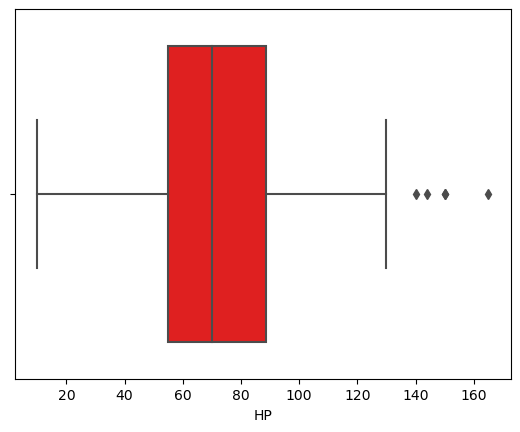

Attack


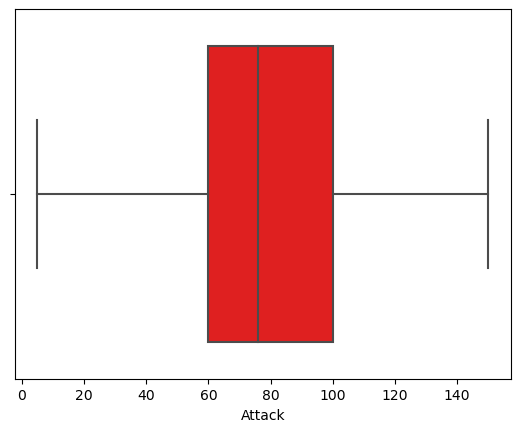

Defense


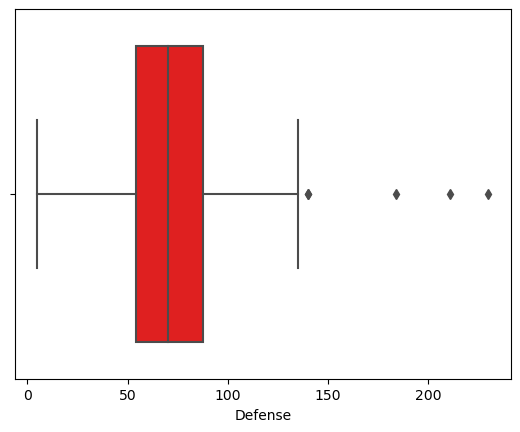

Special_Attack


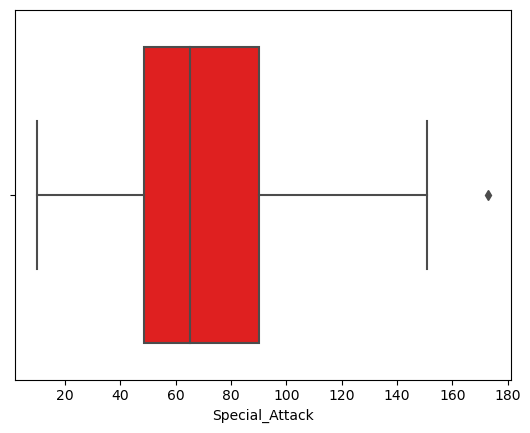

Special_Defense


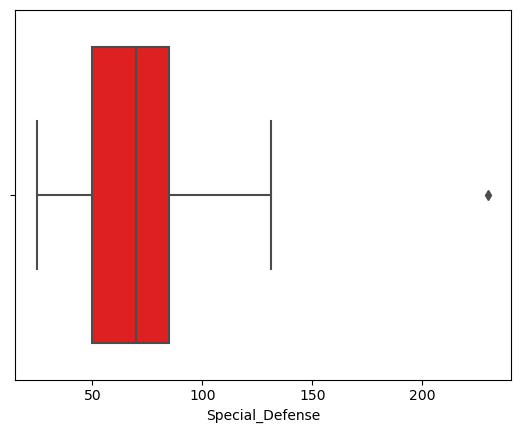

Speed


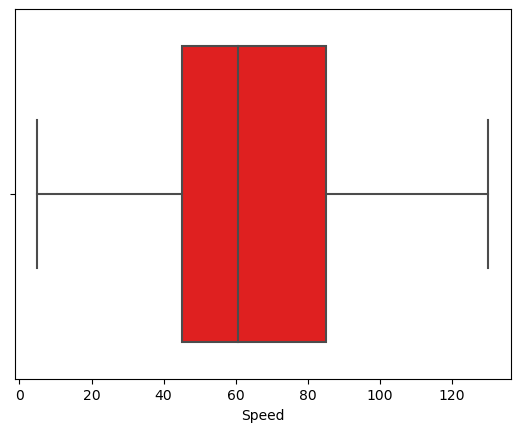

Height_M


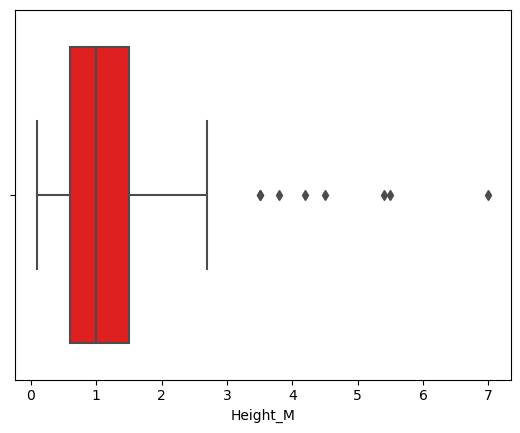

Weight_KG


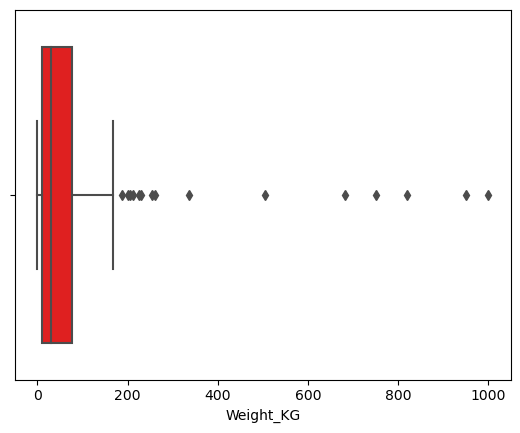

In [99]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [100]:
test_df['L_Hp'] = np.log(test_df['HP'])
test_df['L_Defense'] = np.log(test_df['Defense'])
test_df['L_Special_Attack'] = np.log(test_df['Special_Attack'])
test_df['L_Special_Defense'] = np.log(test_df['Special_Defense'])
test_df['L_Height'] = np.log(test_df['Height_M'])
test_df['L_Weightkg'] = np.log(test_df['Weight_KG'])

In [101]:
test_df.drop(['HP', 'Defense', 'Special_Attack', 'Special_Defense', 'Height_M', 'Weight_KG'], axis = 1, inplace = True)

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Attack             162 non-null    int64  
 1   Speed              162 non-null    int64  
 2   L_Hp               162 non-null    float64
 3   L_Defense          162 non-null    float64
 4   L_Special_Attack   162 non-null    float64
 5   L_Special_Defense  162 non-null    float64
 6   L_Height           162 non-null    float64
 7   L_Weightkg         162 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 10.2 KB


In [103]:
test_df = scaler.transform(test_df)

In [104]:
predict = clf_randf.predict(test_df)

In [105]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
list(zip(y_test, predict))

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [107]:
df_test['Legendary'] = predict

In [108]:
df_test.head()

,Attack,Speed,L_Hp,L_Defense,L_Special_Attack,L_Special_Defense,L_Height,L_Weightkg,Legendary
0,77,58,4.812184,4.276666,4.595120,4.521789,0.993252,5.416100,0
1,120,50,4.969813,4.094345,3.688879,4.094345,0.832909,5.536547,0
2,60,65,3.806662,3.401197,4.382027,3.912023,-0.510826,2.379546,0
3,55,70,4.499810,4.174387,4.553877,4.442651,0.000000,5.123964,0
4,100,45,4.787492,4.442651,3.401197,4.442651,0.262364,4.016383,0


In [109]:
df_test.to_csv('Submission_pokemon.csv', index = False, header = False)